#### Source Code

Here are the two links to the source code for our linear regression/RFE and random forest model.
https://github.com/CeceZiegler1/ML_Final_Proj/blob/main/LinearRegressionAnalytic.py
https://github.com/CeceZiegler1/ML_Final_Proj/blob/main/RandomForestRegressor.py

# Abstract and Overview of Significance of Topic

Bat speed is a measure of player performance that has become increasingly popular for player development over the past decade. It is typically measured as the speed that the sweet spot of the bat (about 6 inches from the end of the barrel) is traveling when contact is made with the baseball. Bat speed has become increasingly popular due to its high correlation with exit velocity and subsequently hitting metrics such as expected batting average (xBA) or expected weighted on base average (xWOBA). Metrics such as xBA and xWOBA are modern metrics that are used to effectively quantify a players ability to contribute offensively in a positive manner. This increasing popularity in bat speed has led to a related increase in training methodologies based around developing it. Coaches across all levels of play use bat speed as a KPI to validate and inform individualized coaching decisions. 

# Formal Introduction to Topic


For our final project, we are using data from the Open Biomechanics Project (OBP) driveline baseball research. Our data captures the biomechanical breakdown of a baseball player's swing by measuring forces produced by different body parts in three dimensions over exact instances in time, for example, at instance X, player 103’s 2nd swing has a max lead hip force in the y direction of 111.73. The data was captured using a combination of ground force plates, a marker motion capture system, bat speed sensors, and ball flight monitors. The available data is rather robust, accounting for every piece of information that could be responsible for a baseball swing.


For our project, our goal is to create a machine learning model that uses this OBP data to identify the most important features of a player's swing when generating bat speed, and then use those features to accurately predict a player's bat speed. By comparing an athlete's true bat speed to their predicted bat speed based on our model, the player could identify how efficiently they are swinging. We hope that this model could be used by baseball players and coaches to address the unique aspects of a player's swing that could contribute to a higher bat speed, which in turn, would the players reach their fullest potential based on where their inefficiencies lie.
Our project can be broken down into two main processes: 
Identifying the key features that contribute to bat speed.
Creating a model that uses the key features to predict bat speed. 
For the first step, we have decided to run a Recursive Feature Elimination(RFE) on the 60 potential features from our dataset to pull out a smaller number of strong predictive features to use in our model. 
Next, using those select features, we will run a regression analysis to create a model that can be used to predict a player’s bat speed. 
Let’s take a closer look at these analyses. 

# Values Statement
This project will mainly be utilized by coaches or anybody concerned with player development in baseball. The information that our model would provide to coaches would allow them to make better coaching decisions. In addition to helping coaching staffs, the players themselves would also benefit from more directed training and better evaluation standards. The baseball offseason is very short, so being able to make the most of this time is extremely valuable. 

This dataset is the first of is the first of its kind to be released as open source. When open-source pitch physics data first became available, it fundamentally changed the way in which baseball was viewed and played. This information allowed both pitchers and hitters to have reliable and measurable feedback on every pitch. The availability of pitch-level biomechanics data has the potential to once again fundamentally change baseball. By working on this project, we are contributing to the larger effort of the baseball community to better understand exactly what makes a baseball swing productive.
 
# Materials and Methods:

# Data

From the OBP dataset, we will be focusing on baseball-hitting data, specifically force plate and joint velocity to predict bat speed. The original datasets can be found [here](https://github.com/drivelineresearch/openbiomechanics). Driveline baseball research collected this data using a combination of ground force plates, a marker motion capture system, bat speed sensors, and ball flight monitors. Originally, both the force plate and joint velocity datasets had over 1,000,000 observations, with each individual swing including thousands of observations because the swing was broken down by milliseconds. We felt it was unnecessary to keep the time aspect of the dataset, as the velocities produced for each feature variable were very similar from millisecond to millisecond, and the large datasets were difficult to work with. To get rid of the time component and obtain a more reasonably sized data set, we found the minimum, maximum and range of each feature variable in the dataset for every swing. Each swing is labeled by session_swing in our dataset, and each row is a different swing. The session swing is labeled by player ID and swing number, for example, session_swing 111_3 is player 111's third swing. Not all players have the same number of swings in the dataset, but we don't think this should have any impact on our results. After eliminating the time aspect, each swing has 60 potential feature variables. The 60 feature variables include the min, max and range of the forces produced by many different body parts in the x, y and z directions during a player's swing. Some examples include lead shoulder which is the player's shoulder closest to the pitcher, and rear hip which is the player's hip furthest from the pitcher. 

Our data possesses some limitations as it exclusively represents male baseball players and doesn't include any data from female softball players. We think it would be interesting for Driveline baseball research to expand to softball to eliminate some of the gender bias they have inadvertently caused. 


# Recursive Feature Elimination

Recursive Feature Elimination, or RFE is a recursive algorithm that is used to find the most impactful features out of a large feature set. This is accomplished by training machine learning on all the features, and then removing the least impactful features. This process is repeated with the smaller feature set, until the feature set is of the desired size. This can help prevent overfitting and allow for easier use and training. This does require that the model it is being used to select features has a way to calculate the effect of features, which means that it won’t work for every model, or some determinator has to be created for it to be used. Another drawback is that unless proper testing is done to find out the amount of impactful features, the accuracy can be diminished beyond the benefits of avoiding overfitting.

# Multiple Linear Regression

Because our project is concerned with predicting bat speed, we require a numeric prediction model, rather than a classification prediction model. We decided to use Multiple Linear Regression, which allows us to take two or more features in a dataset to predict a single numeric dependent variable, bat speed. Multiple Linear Regression differs from regular Linear Regression in that you can use more than one feature to predict the target variable. Once built, we can isolate each individual feature and evaluate its impact on the target variable.

With our linear regression model, we will be using the Mean Squared Error (MSE) loss function to determine the accuracy and performance of our model. 

# Random Forest Regression

Random Forest Regression is a technique that creates multiple decision trees and averages their outputs to give a final result that often has a high prediction/classification rate. The process involves the user selecting the amount, n, of decision trees to be created, then using the bootstrapping method to randomly select k data samples from the training set. (Bootstrapping is simply the process of randomly selecting subsets from a dataset over a certain number of iterations and a certain number of variables, then the results from each subset are averaged together which returns a more powerful result.) Then, create n decision trees using different random k values. Using the decision trees, predict regression results that can be used on unseen data. Finally, the regression results are all averaged together, returning a final regression output. Random Forests generally provide high accuracy for feature selection as it generates uncorrelated decision trees built by choosing a random set of features for each tree. 


# Variable Overview

The features which we have created our data set with fall into two main categories: biomechanics data and force plate data. Beginning with the biomechanics data, we have a set of joints and their associated angular velocities in three planes of motion. We have information on lead hip, lead shoulder, rear hip, rear shoulder, pelvis, torso, and the torso-pelvis complex. For each of these joints, we calculated the range of velocities and maximum velocities for each swing captured. With the force plate data, the lead foot and rear foot are independently observed, and the data is split among the three planes of motion along the x, y, and z axes. For each pairing of foot and plane of motion, we calculated the minimum, maximum, and range of the force produced.

# The Process

### Step 1: Cleaning the Data

Our original dataset contained over 1,000,000 observations that were grouped by session_swing. Each swing contained hundreds of observations that analyzed a variety of features over time (~0.0028 seconds between captures). For our project, we wanted to remove this time aspect and instead create a simplified dataset that contained the minimum, maximum, and range values of the features of interest for each swing. 

To do so, we imported our dataset in R and grouped it by the session_swing variable, and, by using base R functions, calculated the minimum, maximum, and range of each feature variable of interest. We repeated this for the force plate dataset and joint velocity dataset, then used left-join to combine the two datasets to create a conglomerate dataset with all potential predictive features for each session_swing variable. 

We then added our target vector, max bat speed, from POI_metrics.csv to create our fill dataset that includes our target vector. 

This process allowed us to get reduce the size of our dataset from over 1,000,000 observations to 665 session_swings.

### Step 2: RFE Feature Selection  

We used SKLearn’s RFE feature collection class, which can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html). 

The RFE model from the SKLearn class allowed us to gain the base understanding we needed to implement our own version of RFE. After reading through the API and playing around with the RFE feature from SKLearn, we decided to implement our own version of RFE to use with the linear regression model we also implemented. Our RFE function tkaes in three parameters: a feature matrix, X, a target vetor, y, and the number of features we want to be selected, k. The function uses a nested for loop to run through all values i in 1:k and at each iteration, j, checks the weight of all the remaining features that were fit on the linear regression model. From here, the best features are selected as the features with the minimum absolutle value of weight. We use this function in conjunction with our linear regression model to find the number of feautres within our dataset that most accuratley predict the batspeed of a player.

### Step 3: Building the Models — Multiple Linear Regression and Random Forest

We decided to implement our own linear regression model similar to the work we did in class, selecting just the analytic version. We were able to pull out score and predict functions from our previous blog post implementation. We had to modify our fit function by adding a regualarization term to the weight vector to help avoid over/under-fitting the model.

### Step 4: Testing the Models: Linear Regression and Random Forest

To test and train the models, we used an 80/20 train/test split. For both models, we ran a loop to show our the training and testing scores while increasing the number of selected features for the recursive feature elimination model. Once we identified the optimal range of features to use on the Multiple Linear Regression and Random Forest Regression models, we created subsets of our training and testing data to contain the selected features. Finally, we trained and tested our models on the data subsets (80 train/20 split). 

# Results and Conclusion

### Linear Regression
Below shows the effect of increasing the number of features on the accuracy scores produced by the Linear Regression model during RFE. As we can see, our training and testing accuracy scores tend to increase as the number of features increase.

We noticed that our model tends to have a higher testing accuracy when the model is ran on fewer features, and has the best training score when the model uses all 60 features. However, because we wanted to identify 10-20 key features, we decided to train and test our model on the 13 best features, which we selected as value that yields the second best testing score.

The table shows the 13 most important features as selected by our RFE function. These results were quite unexpected, including values like min_rfx and min_rfy as selected variables of importance. min_rfx and min_rfy represent the minimum rear force produced in the x and y directions, which essentially represent the load, or backwards movement prior to the actual swing itself. Other variables make sense as being some of the most important features, such as range_lead_hip_z, and max_torso_pelvis_x as these are body parts that are essitial in creating the rotational force of a swing to help produce a better bat speed. 

Using a subset of these 13 features, we trained and tested our model, which produced a testing accuracy score of 38.7%. Unfortunately, this low accuracy indicates that our model isn't performing as we had hoped. It could mean that our data doesn't have a strong linear seperability which indicates there is nothing wrong with our model, but rather it isn't the best model option for our data. Becasue of this, we decided to see if we could produce stronger results by using the Random Forest Regression model.

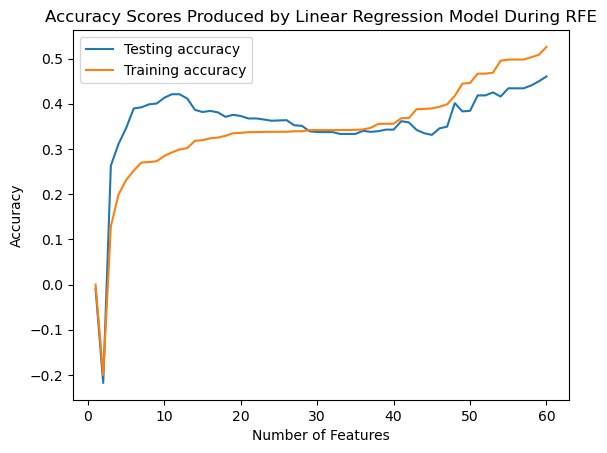

,max_rear_shoulder_x,max_rear_shoulder_y,range_lead_hip_z,max_rear_shoulder_z,max_torso_y,range_lead_shoulder_z,max_torso_pelvis_x,min_rfx,min_rfy,range_rear_shoulder_y,range_torso_pelvis_x,max_lead_hip_z,max_pelvis_y
0,550.0243,514.1198,778.1339,1188.6807,182.7302,867.6362,182.4743,-232.2776,-88.0097,689.2249,233.0842,384.3450,88.3858
1,638.6019,535.2822,960.4793,1278.5380,196.9712,1054.5098,236.0902,-189.7241,-106.2254,812.9988,306.7874,520.8627,106.4238
2,580.0406,472.9189,784.0413,1588.7207,248.4432,988.9415,222.8233,-124.4299,-84.5785,708.1030,313.2967,433.6955,82.5397
3,635.8561,484.2663,1036.2757,888.1270,166.9048,1472.7250,168.7606,-175.8547,-122.1629,732.5588,228.6738,489.4716,81.4764
4,566.9714,502.2202,1093.3019,1487.6143,191.2448,1130.6572,220.7400,-219.5387,-72.5831,699.1772,286.4758,597.7220,75.9968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,631.5529,488.3580,980.3030,1575.2948,165.8830,1150.6032,147.9856,-114.1301,-173.2356,804.6660,239.9022,354.5130,124.7927
633,571.2316,477.7701,748.3298,1604.9299,145.5400,1026.0944,188.9410,-113.4915,-157.5923,735.1128,276.8293,324.9995,137.1521
634,549.3600,407.3251,526.3367,1393.4961,128.0184,1029.3547,257.2261,-112.7565,-111.9854,584.3304,348.2130,207.2101,128.8111
635,623.2650,463.8467,1248.0062,1715.0544,136.8013,892.8699,177.4202,-122.3425,-161.2802,725.1355,266.6244,282.0038,157.1024


Testing Accuracy of Subset: 0.386607442390802


In [1]:
from LinearRegressionAnalytic import LinearRegressionAnalytic
from LinearRegressionAnalytic import rfe
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
data = pd.read_csv("biomechanics_dataset_v1.csv") 

np.random.seed(1)
X = data.iloc[:,1:60]
y = data.iloc[:, 60]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = .2)


val_scores = []
train_scores = []
for k in range(60):
    selected_features = rfe(x_train, y_train, k)
    feature_mask = np.zeros(x_train.shape[1], dtype=bool)
    #masking to include only the selected features
    feature_mask[selected_features] = True
    #subseting x train and test to include only selected feautres
    X_train_selected = x_train.loc[:, feature_mask]
    X_test_selected = x_test.loc[:, feature_mask]
    lr = LinearRegressionAnalytic()
    #fitting model on selected features
    lr.fit(X_train_selected, y_train)
    #appending score to score list
    val_scores.append(lr.score(X_test_selected, y_test))
    train_scores.append(lr.score(X_train_selected, y_train))

# plot the results
import matplotlib.pyplot as plt
plt.plot(range(1, 61), val_scores, label='Testing accuracy')
plt.plot(range(1, 61), train_scores, label='Training accuracy')
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Scores Produced by Linear Regression Model During RFE")
plt.show()


feat_select = rfe(x_train, y_train, 14)
feat_select
display(data.iloc[:,[33, 34, 3, 35, 37, 6, 39, 43, 45, 14, 19, 23, 28]])


x_train_lin = x_train.iloc[:,[33, 34, 3, 35, 37, 6, 39, 43, 45, 14, 19, 23, 28]]
x_test_lin = x_test.iloc[:,[33, 34, 3, 35, 37, 6, 39, 43, 45, 14, 19, 23, 28]]

lr.fit(x_train_lin, y_train)
print("Testing Accuracy of Subset:", lr.score(x_test_lin, y_test))

### Random Forest Regression 
Below is a graph that displays the training and testing scores produced by the Random Rorest Regression model when ran with RFE over all of the features. As we can see from the graph, this model performed much better than the Linear Regression model. Unlike the Linear Regression model, the Random Rorest model reached a peak around 10 features and maintained consistency at that score, whereas the Linear Regression model had increased variance between scores across all of the features. 

Because the Random Forest Regression model creates a series of trees using the bootstrapping method, we expected the model to have a better training accuracy and weren't as concerned with overfitting. We also expected it to have a better accuracy score than the Linear Regression model because it can capture non-linear relationships, which we expect our data to have due to the poor performance of the Multiple Linear Regression model. Aditionally, because of the way the trees are built, the random forest model is less likely to be heavily affected by outliers in the data which will allow it to have a better testing accuracy score. 

We found that the Random Rorest Regression model had the higher training and validation scores than the Linear Regresion model. The training score reached nearly 100% when ran with more than 10 features. The testing accuracy reached around 65% at 10 features and had a slight increase as the number of features increased. To compare this model with the Linear Regression model, we chose the 15 most important features to test and train the Random Forest model. After training and testing our model on the subset of 15 features, we got a testing accuracy score of 55.4%, which is significantly better than our multiple linear regression model. Considering there is no option for our model to randomly guess since we are predicting a continuous numeric value, we are satisfied with the amount our random forest model learned. 

Interestingly, there is only one feature that the Linear Regression model and the Random Forest Regression model both selected: max_rear_shoulder_y. This feature captures the top hand on the bat, so if the shoulder isn't moving in the swing, it will hinder the ability to produce enough rotational force from the torso.

We were suprised to find that, of the 13 features selected by the Linear Regression model and of the 15 features selected by the Random Forest Regression model, there weren't more similarities amongst the selected features between the two models. We were hoping to discover a few select features that both models identified as important features, and were interested to find that the majority of the selected features were different. 

We hypothesize that the dimentionality of the forces produced by each body part may be a factor that contributes toward the challenge of distinguishing significant features. For example, in the Linear Regression model, max_toros_y was selected as an important feautre, and in the Random Forest Regression model, max_torso_z was selected as an important feature. This indicates that the max force produced by the torso is important when creating and predicting bat speed. If we were to run this experiment again, we may try getting rid of the x, y and z components and just use the average of the forces produced by that body part.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
model = RandomForestRegressor()
scores_test = []
scores_train = []

for x in range(60):
    estm = RFE(model, n_features_to_select = x+1, step = 1)
    estm.fit(x_train,y_train)
    scores_test.append(estm.score(x_test,y_test))
    scores_train.append(estm.score(x_train,y_train))
    
import matplotlib.pyplot as plt

x_val= [] 

for j in range (60):
    x_val.append(j+5)

  
plt.plot(x_val, scores_test, label='Testing accuracy')  # Plot the chart
plt.plot(x_val, scores_train, label='Training accuracy')
plt.xlabel("Number of Features")
plt.ylabel("Accuracy Score")
plt.title("Random Forest Regression")
plt.legend()
plt.show() 

In [22]:
from RandomForestRegressor import RandomForest
rf = RandomForest()

x_train_rf = x_train.iloc[:,[1,8,13,18,21,26,29, 34,38, 46,48,55,56,58]]
x_test_rf = x_test.iloc[:,[1,8,13,18,21,26,29, 34,38, 46,48,55,56,58]]

rf.fit(x_train_rf, y_train, 1000,500)
print(rf.score(x_test_rf, y_test))

feat_select = rfe(x_train, y_train, 14)
feat_select
display(data.iloc[:,[1,8,13,18,21,26,29, 34,38, 46,48,55,56,58]])

0.5541368058167476


,range_lead_hip_x,range_pelvis_y,range_rear_shoulder_x,range_torso_z,range_torso_pelvis_z,max_lead_shoulder_z,max_pelvis_z,max_rear_shoulder_y,max_torso_z,max_rfz,max_lfx,range_rfy,range_rfz,range_lfy
0,590.6812,371.0611,838.0101,848.3957,743.5585,617.1386,733.6451,514.1198,775.7749,1101.3711,121.2052,240.6389,1052.5648,545.3695
1,536.1970,393.4254,947.9660,814.2556,642.8480,751.1699,799.8748,535.2822,775.3766,1092.3006,111.2187,297.5680,1040.9895,603.8510
2,586.8320,396.8130,801.1592,823.2495,853.6754,723.6880,740.7065,472.9189,793.0441,1117.9434,178.4852,351.2961,1002.5322,599.4007
3,628.4384,402.3244,958.8471,870.6640,541.5395,810.9479,741.3719,484.2663,819.9890,1102.4140,170.5486,344.0314,1094.4491,617.4273
4,595.3172,348.1626,840.4242,809.9368,756.6446,862.6313,770.4950,502.2202,774.5865,1119.0327,176.3782,262.0008,1100.7345,597.7741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,825.4631,350.8260,1015.7101,919.6701,587.4149,838.6431,679.5463,488.3580,859.0192,947.5325,69.2794,380.5133,916.4106,464.0069
633,768.7166,377.7951,1020.7830,910.0289,716.7429,799.7780,715.3288,477.7701,846.6447,958.0700,60.6210,365.7219,931.9138,471.4245
634,667.8735,366.3885,978.3792,880.3159,516.4786,815.2906,701.0455,407.3251,820.1794,998.6667,56.2369,331.5945,954.3035,441.1844
635,698.0434,390.7154,1029.8385,896.8795,616.6955,604.2217,681.9455,463.8467,838.6638,939.1254,67.6610,383.2294,909.9346,533.1048


### Concluding Discussion
Overall, our project was sucessful, as we built two models and an RFE function to help us determine the most important features of a swing while predicting bat speed. When we formulated the idea for our project idea, our goal was to deliver python source code that we constructed, along with two jupyter notebooks. One that contained our intial exploration, and one that held our final write up and experiments. We were sucessful in meeting this goal, as we finished with more than two jupyter notebooks, and two python source code files that contained our linear regression with RFE and our random forest model. 

If we had more time, we would work on finding ways to improve the accuracy of our models. One idea we have to improve accuracy score is to get rid of the dimension factor, as we mentioned above, so each biomechanic force only has one representation instead of three. We hope this would help our models narrow down the important features and produce a better accuracy score. Additionally, we would like to bring in more data to train and test our model on. DriveLine baseball technology is relatively new, so the data is sparse. If the technology was more accesible, we could have more data which would allow our model to improve its success. 

# Bias
We created a model that predicts a player’s bat speed with approximately 65% accuracy, using around 10 features. As with any algorithm, we must consider any assumptions or biased data that could have resulted in systematic error throughout our process. Because our training data came from the Driveline Research and Development, our model was only trained on the players with close proximity or eligibility to their biomechanics facility. According to the [U.S. Census](https://www.census.gov/quickfacts/fact/table/kentcitywashington#), 43.3% of the population of Kent, Washington (home of Driveline R&D) are white individuals, contrasted with 12.2% of the population being black individuals. While the data’s goal is to highlight specific bodily forces and movements that contribute to predicting bat speed rather than demographics like race, age, height, or weight, we must acknowledge that this data is most likely skewed toward white individuals and could be less accurate in predicting the bat speed of players of different races. 

Additionally, we must highlight that baseball is a male-dominated sport, with the rare exception of a few women playing the sport — see [article on Alexis Hopkins](https://thehill.com/blogs/blog-briefing-room/news/599846-woman-makes-history-as-first-on-field-player-for-a-professional/). While sports are typically gender segregated for the sake of “fairness” and an acknowledgment that male and female bodies are inherently different and will perform as such, factors like absolute strength and size are not as important in the sport of baseball, as they might be in gender-segregated sports like football and soccer. Rather, the [Women’s Sports Foundation](https://www.womenssportsfoundation.org/wp-content/uploads/2016/10/co-ed-participation-womens-participation-in-mens-professional-baseball-the-foundation-position.pdf) explains that baseball involves skills that are combinations of timing, coordination, strength, knowledge of the game, strategies, and control, and argues that bat speed and bat control are more important than absolute strength. 

Yet, despite all of this, the Driveline R&D data only contains the biomechanics of male batters. Therefore, if our model were to be improved and implemented, it would only perpetuate the segregation of men and women in this sport. If the data to improve a player’s bat speed can only improve male players, women will continue to be left in the dust.

Driveline Baseball describes its [mission](https://www.drivelinebaseball.com/mission-and-purpose/) as developing the future of baseball training by finding industry-leading insights; all while publishing those insights back to the baseball community where they belong. However, because baseball is a historically white and male-dominated sport, the “insights” that will be found will only contribute to solidifying that the “baseball community” remains dominated by players that fit those demographics. 

It is our duty to expand this research and development into more marginalized player communities, such as female athletes and athletes of other races. Then, we can use these insights to create unique training programs that empower and embrace their unique features and help them become the best athletes they can be. 

# Application
Our bat speed model could be used by coaching staffs to better inform the decisions that they make. For example, if a given player's predicted bat speed is higher than their actual recorded bat speed, this would indicate a mechanical inefficiency in their swing. Coaches, with this knowledge, could then direct their focus to finding these mechanical ineffeciencies and correcting them. Players in this group would spend more time on skill acquisition training. On the other hand, if a player has a predicted bat speed which is equal to or lower than their actual bat speed, this would indicate above average efficiency in their swing and their training could be directed more towards general strength and power to increase force production. In either case, our model would help streamline the process from data collection to impact, giving coaches and players the power to have impactful training sessions tailored to each individual. 


# Group Contribution Statement


Cece Ziegler: Helped with data cleaning. Built RFE function and Linear Regression model. Performed RFE and model experiments. Led writing "Results and Conclusion" sections.

David Byrne: Introduced topic. Managed data cleaning. Led writing of "Abstract and Overview of Significance of Topic", "Data", "Variable Overview", "Values Statement", and "Application" sections.

Julia Fairbank: Led writing of "Formal Introduction to Topic", "Recursive Feature Elimination", "Multiple Linear Regression", "Random Forest Regression", "The Process", and "Bias" sections. 

Sam Ehrsam: Conducted initial RFE experiments with SKLearn library. Built Random Forest Regression model. Performed RFE experiments.